# Proyecto: Regresión logística multivariada
## Modelo que predice si una persona tiene diabetes
## Asignar una clasificación binaria de acuerdo a $n$ variables independientes

In [1]:
import pandas as pd 

# metrics contiene la función para generar la matriz de confusión:
from sklearn import metrics

# importamos función para separar datos de enrenamiento y pruebas:
from sklearn.model_selection import train_test_split

# importamos modelo de regresión logistica:
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt 

import seaborn as sns 

import numpy as np

In [2]:
# Cargamos datos:

my_data = pd.read_csv('./Datos/diabetes.csv')

my_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
my_data.shape

(768, 9)

In [4]:
# La columna 'Outcome' indica si es una persona con diabetes o no

In [6]:
# Extraemos solo algunas columnas:
feature_cols = ['Pregnancies', 'Insulin' ,'BMI', 'Age', 'Glucose', 'BloodPressure','DiabetesPedigreeFunction']

X = my_data[feature_cols]
y = my_data['Outcome']


In [7]:
# Separamos datos para entrenamiento y pruebas:
p_train = 0.75 #<-- porcentaje de datos de entrenamiento

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = p_train, random_state =0 )
# random_state =0 <--- indica que cada vez que ejecutamos el modelo, dicho conjunto sea fijo

In [8]:
# definimos el algoritmo de entrenamiento:
log_reg = LogisticRegression()

# Entrenamos el algoritmo:
log_reg.fit(X_train,y_train)

/home/marck/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
# Aplicamos el aprendizaje a los datos de prueba:
y_pred_test = log_reg.predict(X_test)

In [10]:
# Generamos la matriz de confusión:
M_conf = metrics.confusion_matrix(y_test , y_pred_test)
M_conf

array([[117,  13],
       [ 24,  38]])

Text(0.5, 257.44, 'Etiqueta predicha')

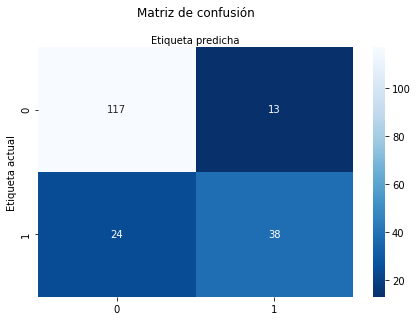

In [11]:
class_names = [0,1]

fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks , class_names)
plt.yticks(tick_marks , class_names)

sns.heatmap(pd.DataFrame(M_conf) , annot= True , cmap= 'Blues_r' , fmt ='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusión' , y = 1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta predicha')

In [12]:
# Evaluamos la precisión de la predicción:
c = log_reg.score(X_test , y_test)

print('El modelo puede predecir a un ',c*100,' % ')

El modelo puede predecir a un  80.72916666666666  % 


In [13]:
# Otra forma de evaluar la precisión de la predicción:
d = metrics.accuracy_score(y_test, y_pred_test)

print('El modelo puede predecir a un ',d*100,' % ')

El modelo puede predecir a un  80.72916666666666  % 
